In [2]:
import surp
import arya
import matplotlib.pyplot as plt
import numpy as np

# Timestep convergence

In [13]:
mid = surp.ViceModel.from_file("../../models/fiducial/run/model.json")

In [14]:
low = surp.ViceModel.from_file("../../models/fiducial/dt0.05/model.json")
high = surp.ViceModel.from_file("../../models/fiducial/dt0.01/model.json")


In [15]:
models = [low, mid, high]
labels = ["dt=0.05", "dt=0.02", "dt=0.01"]

In [16]:
print("timestep \t dt \t dt_err \t \t n steps")

for i in range(len(models)):
    model = models[i]
    ts = np.unique(model.history.time)
    dts = np.diff(ts)
    print(labels[i], "\t", np.mean(dts), "\t", np.std(dts), "\t", len(ts))

timestep 	 dt 	 dt_err 	 	 n steps
dt=0.05 	 0.05 	 5.851698501095728e-16 	 264
dt=0.02 	 0.02 	 5.356360389248432e-16 	 661
dt=0.01 	 0.01 	 4.263663964661644e-16 	 1321


(-1.0, 1.0)

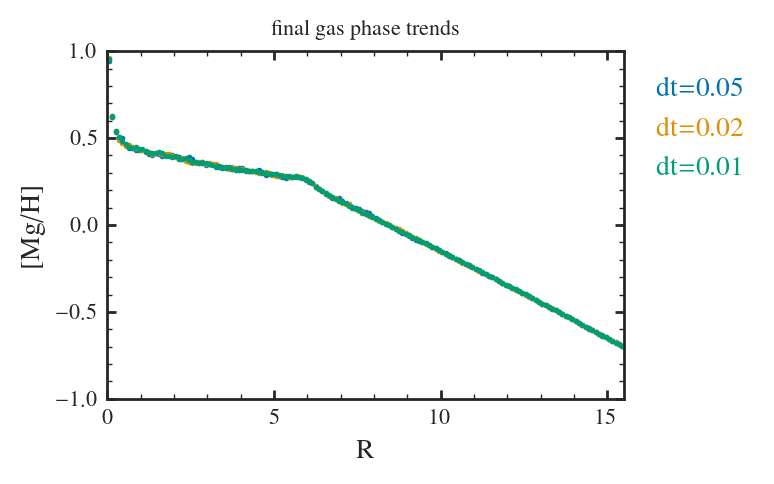

In [17]:
plt.figure()
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.MG_H, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[Mg/H]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")
plt.xlim(0, 15.5)
plt.ylim(-1, 1)

Text(0.5, 1.0, 'final gas phase trends')

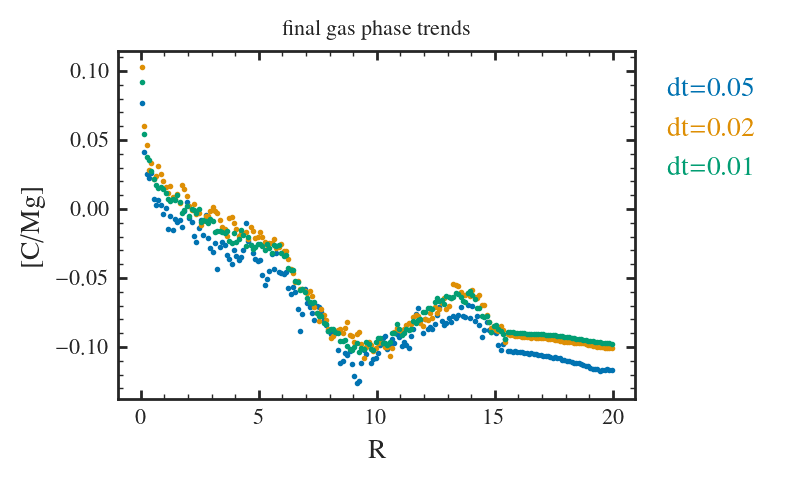

In [18]:
plt.figure()
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.C_MG, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

Text(0.5, 1.0, 'final gas phase trends')

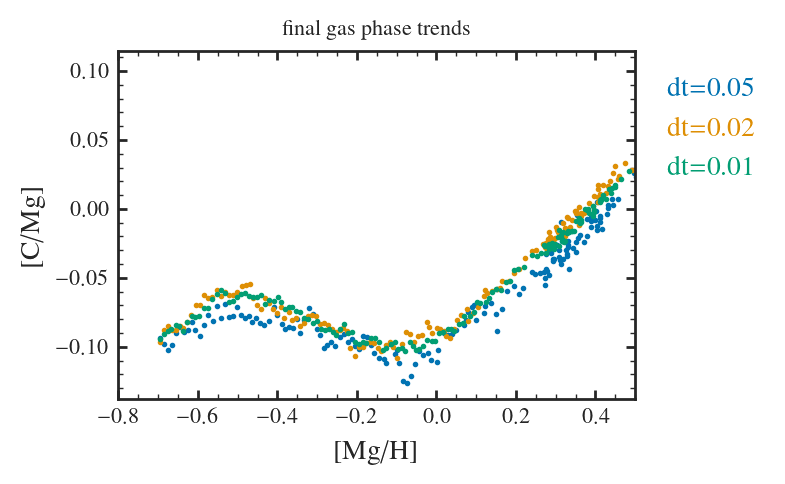

In [19]:
plt.figure()
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.MG_H, h_end.C_MG, s=1, label=label)

plt.xlim(-0.8, 0.5)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

Text(0.5, 1.0, 'final gas phase trends')

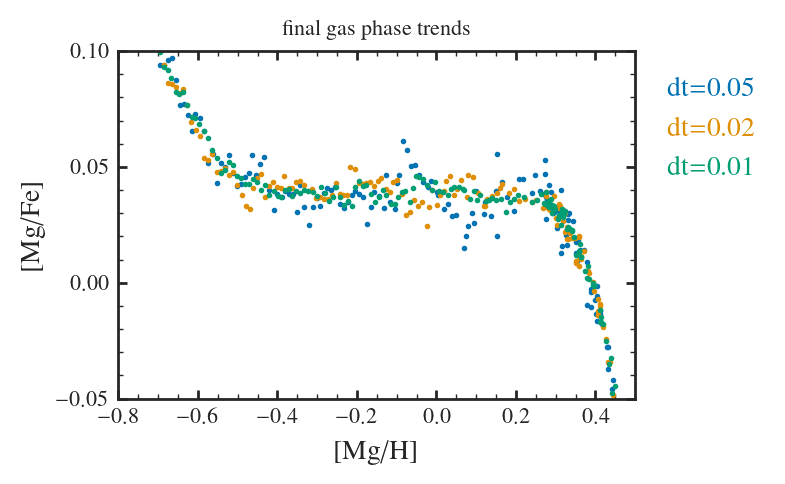

In [20]:
plt.figure()
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.MG_H, h_end.MG_FE, s=1, label=label)

plt.xlim(-0.8, 0.5)
plt.ylim(-0.05, 0.10)
plt.xlabel("[Mg/H]")
plt.ylabel("[Mg/Fe]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

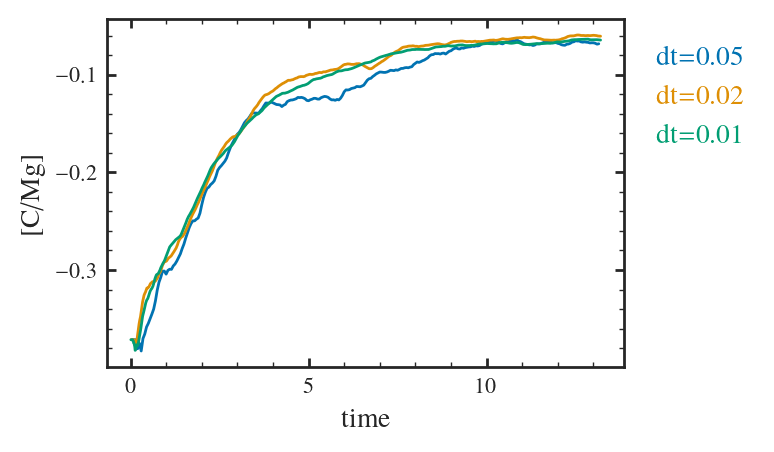

In [21]:
plt.figure()
R0 = 7.05
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    h = model.history[np.isclose(model.history.R, R0)]
    plt.plot(h.time, h.C_MG, label=label)
    
plt.xlabel("time")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)


/arc7/home/dboyea/arya/arya/legend.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.mpl_leg = plt.legend(**kwargs)


Text(0.5, 1.0, 'stars')

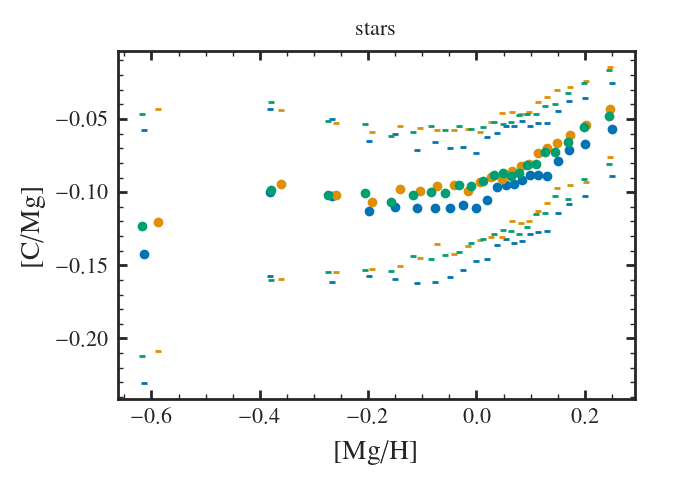

In [22]:
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    c = arya.COLORS[i]
    df = model.stars[~model.stars.high_alpha]
    arya.medianplot(df, "MG_H", "C_MG", binsize=500, color=c)
plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("stars")

Text(0.5, 0, 'R origin (sample)')

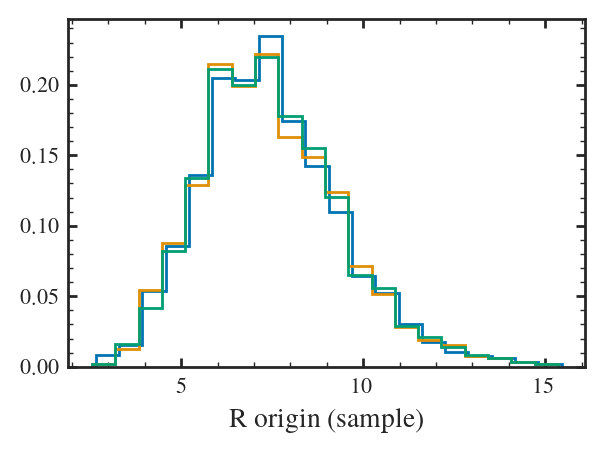

In [23]:
for i in range(len(models)):
    model = models[i]
    label = labels[i]
    s = model.stars
    plt.hist(s.r_origin, 20, histtype="step", density=True)
    
plt.xlabel("R origin (sample)")

Everything converges (yay!)

# Zone width

In [3]:
mid = surp.ViceModel.from_file("../../models/fiducial/run/model.json")

In [4]:
low = surp.ViceModel.from_file("../../models/fiducial/zone_width0.2/model.json")
high = surp.ViceModel.from_file("../../models/fiducial/zone_width0.05/model.json")


In [5]:
models = [high, mid, low]
labels = ["zw=0.05", "zw=0.1", "zw=0.2"]
zw = [0.05, 0.1, 0.2]

In [6]:
print("zw\t nzones\t zone_max")
for i in range(3):
    model = models[i]
    print(zw[i], "\t", len(model.history.R.unique()), "\t", np.max(model.stars.zone_final), "\t", np.max(model.stars_unsampled.zone_origin))

zw	 nzones	 zone_max
0.05 	 400 	 226.0 	 399.0
0.1 	 200 	 113.0 	 199.0
0.2 	 100 	 56.0 	 99.0


(-1.0, 1.0)

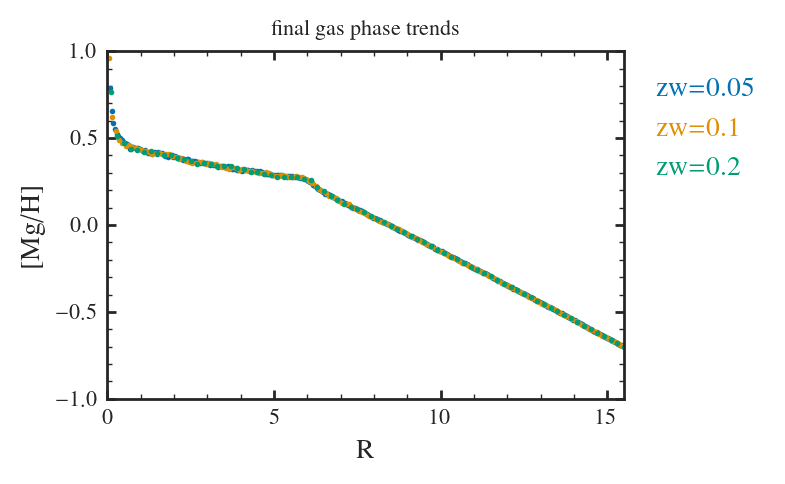

In [7]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.MG_H, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[Mg/H]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")
plt.xlim(0, 15.5)
plt.ylim(-1, 1)

Text(0.5, 1.0, 'final gas phase trends')

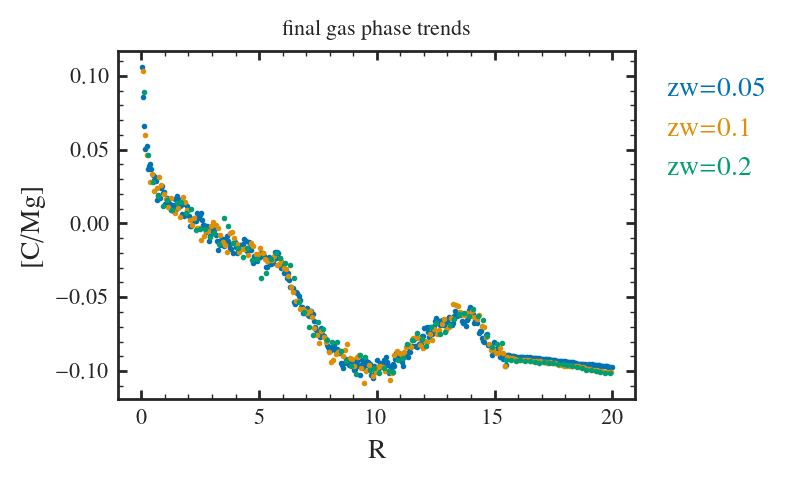

In [8]:
plt.figure()
for i in range(3):
    model = models[i]
    label = labels[i]
    t_end = np.max(model.history.time)
    h_end = model.history[model.history.time == t_end]
    plt.scatter(h_end.R, h_end.C_MG, s=1, label=label)

plt.xlabel("R")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)
plt.title("final gas phase trends")

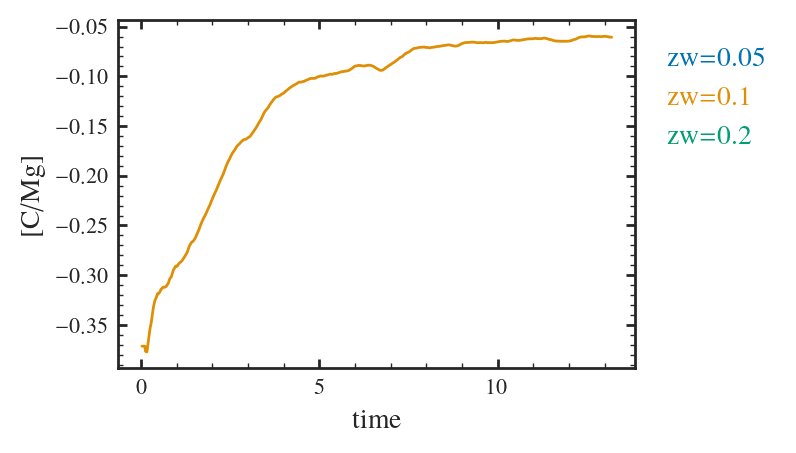

In [9]:
plt.figure()
R0 = [7.1, 7.05, 7.075]
for i in range(3):
    model = models[i]
    label = labels[i]
    h = model.history[np.isclose(model.history.R, R0[i])]
    plt.plot(h.time, h.C_MG, label=label)
    
plt.xlabel("time")
plt.ylabel("[C/Mg]")
arya.Legend(loc=-1, color_only=True)


Text(0, 0.5, 'density')

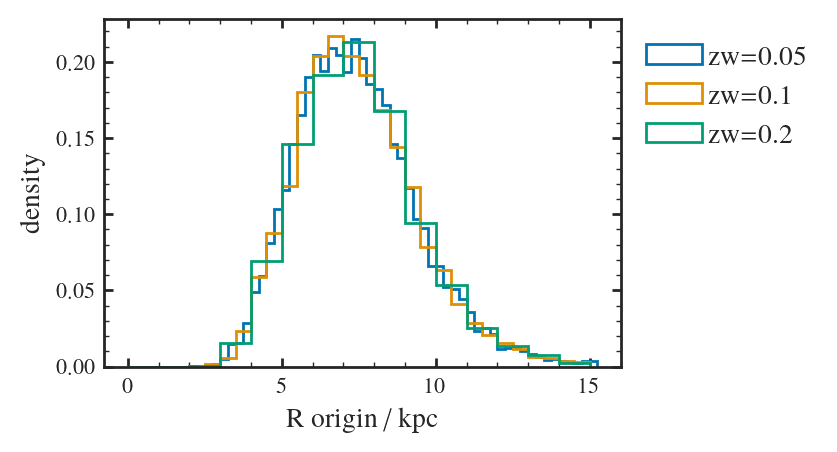

In [10]:
plt.figure()

for i in range(3):
    plt.hist(models[i].stars.r_origin, bins=np.arange(0, 15.5, 5*zw[i]), histtype="step", label=labels[i], density=True)
    
arya.Legend(loc=-1)
plt.xlabel("R origin / kpc")
plt.ylabel("density")

In [11]:
np.max(mid.stars.zone_origin)

np.float64(153.0)

In [12]:
np.max(low.stars.zone_origin)

np.float64(77.0)